In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

import os
import sys
import glob
from itertools import cycle

import numpy as np
import pandas as pd

from os.path import join

import seaborn as sns

import mdtraj as md
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

import pyemma

import random

from os.path import join

from collections import OrderedDict
from collections import defaultdict


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.6.5 |Anaconda custom (64-bit)| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]

matplotlib version: 2.2.2
pandas version: 0.23.1
numpy version: 1.12.1
seaborn version: 0.8.1


In [2]:
indir = './Trajectories_all'
topfile =  indir+'/open10_dry.parm7'
from glob import glob
traj_list = glob(indir+'/*.nc')

In [3]:
ref1 = md.load('./Trajectories_all/open10_dry.rst7', top='./Trajectories_all/open10_dry.parm7')
ref2 = md.load('./Trajectories_all/closed10_dry.rst7', top='./Trajectories_all/closed10_dry.parm7')

In [4]:
feat = pyemma.coordinates.featurizer(topfile)
feat.add_minrmsd_to_ref(ref1)
feat.add_minrmsd_to_ref(ref2)
feat.describe()

['minrmsd to frame 0 of <mdtraj.Trajectory with 1 frames, 2808 atoms, 192 residues, and unitcells at 0x7f1c9608b0b8>',
 'minrmsd to frame 0 of <mdtraj.Trajectory with 1 frames, 2808 atoms, 192 residues, and unitcells at 0x7f1c960bd0b8>']

In [5]:
feat.dimension()

2

In [6]:
inp = pyemma.coordinates.source(traj_list, feat)

In [7]:
inp[:, 0]

TypeError: 'FeatureReader' object is not subscriptable

In [8]:
pyemma.plots.plot_free_energy(np.concatenate(inp)[:, 0], np.concatenate(inp)[:, 1])
plt.xlabel('RMSD to Open') 
plt.ylabel('RMSD to Closed');

TypeError: The first input argument needs to be a sequence

In [8]:
print('number of trajectories =',inp.number_of_trajectories())
print('trajectory length =',inp.trajectory_length(0),'frames')
print('trajectory time =',(inp.trajectory_length(0)*50/1000),'ns')
print('trajectory time step =',(inp.trajectory_length(0)*50)/inp.trajectory_length(0),'ps')
print('number of dimension =',inp.dimension())

S=0
for i in range(0, inp.number_of_trajectories()):
    #print(inp.trajectory_length(i))
    S += inp.trajectory_length(i)
S*=50/1000000
print('total simulated time =',S,'μs')

number of trajectories = 10
trajectory length = 40200 frames
trajectory time = 2010.0 ns
trajectory time step = 50.0 ps
number of dimension = 2
total simulated time = 19.91555 μs


In [9]:
tica_obj = pyemma.coordinates.tica(data=inp, lag=20, var_cutoff=1 )
print('TICA dimension ', tica_obj.dimension())

TICA dimension  2


In [10]:
tica_obj.cumvar

array([ 0.58780609,  1.        ])

In [11]:
Y = tica_obj.get_output()

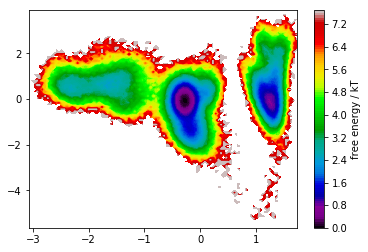

In [12]:
pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1]);

In [13]:
n_clusters = 9 

In [14]:
clustering = pyemma.coordinates.cluster_kmeans(Y,k=n_clusters)

29-06-18 11:34:26 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


In [15]:
#dtrajs = clustering.dtrajs

In [16]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(clustering.clustercenters)):
        plt.text(clustering.clustercenters[i][0]+0.05, clustering.clustercenters[i][1]+0.05, i, fontsize=10, color='black')


<Figure size 432x288 with 0 Axes>

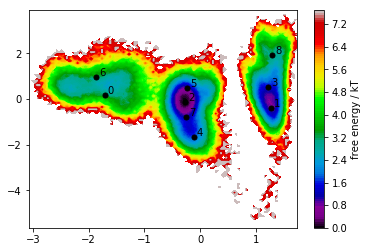

In [17]:
plt.figure()
pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1])
cc_x = clustering.clustercenters[:, 0]
cc_y = clustering.clustercenters[:, 1]
plt.plot(cc_x, cc_y, linewidth=0, marker='o', markersize=5, color='black')
plot_labels()

In [19]:
labels = clustering.dtrajs
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels[0]):
    mapping[label].append(i)
mapping

defaultdict(<function __main__.<lambda>()>,
            {3: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
         

In [21]:
for i in range(0,len(clustering.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping[i])))

size of cluster 0: 0 structures
size of cluster 1: 22923 structures
size of cluster 2: 197 structures
size of cluster 3: 1154 structures
size of cluster 4: 3 structures
size of cluster 5: 15802 structures
size of cluster 6: 0 structures
size of cluster 7: 121 structures
size of cluster 8: 0 structures


In [24]:
dtrajs = pyemma.coordinates.assign_to_centers(Y, clustering.clustercenters)

In [25]:
labels = dtrajs
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels[0]):
    mapping[label].append(i)
mapping

defaultdict(<function __main__.<lambda>()>,
            {2: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
         

In [26]:
for i in range(0,len(clustering.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping[i])))

size of cluster 0: 25 structures
size of cluster 1: 19665 structures
size of cluster 2: 1192 structures
size of cluster 3: 0 structures
size of cluster 4: 0 structures
size of cluster 5: 5101 structures
size of cluster 6: 14217 structures
size of cluster 7: 0 structures
size of cluster 8: 0 structures


In [53]:
clustering = pyemma.coordinates.cluster_regspace(data=Y, dmin=1)

<Figure size 432x288 with 0 Axes>

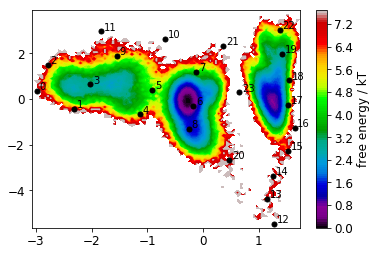

In [54]:
plt.figure()
pyemma.plots.plot_free_energy(np.vstack(Y)[:, 0], np.vstack(Y)[:, 1])
cc_x = clustering.clustercenters[:, 0]
cc_y = clustering.clustercenters[:, 1]
plt.plot(cc_x, cc_y, linewidth=0, marker='o', markersize=5, color='black')
plot_labels()

In [55]:
labels = clustering.dtrajs
mapping = defaultdict(lambda : [])
for i, label in enumerate(labels[0]):
    mapping[label].append(i)
for i in range(0,len(clustering.clustercenters)):
    print('size of cluster %d: %d structures' % (i, len(mapping[i])))

size of cluster 0: 290 structures
size of cluster 1: 197 structures
size of cluster 2: 32 structures
size of cluster 3: 402 structures
size of cluster 4: 315 structures
size of cluster 5: 7614 structures
size of cluster 6: 25113 structures
size of cluster 7: 5598 structures
size of cluster 8: 413 structures
size of cluster 9: 0 structures
size of cluster 10: 0 structures
size of cluster 11: 0 structures
size of cluster 12: 0 structures
size of cluster 13: 0 structures
size of cluster 14: 0 structures
size of cluster 15: 0 structures
size of cluster 16: 0 structures
size of cluster 17: 0 structures
size of cluster 18: 0 structures
size of cluster 19: 0 structures
size of cluster 20: 0 structures
size of cluster 21: 2 structures
size of cluster 22: 0 structures
size of cluster 23: 224 structures
